# Multiyear flux and seasonal averaging

In [7]:
import sys

# laptop
#sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )

# UNM desktop
sys.path.append( 'C:\\Code\\NMEG_utils\\py_modules\\' )
af_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\'
fig_path = 'C:\\Research_Flux_Towers\\Plots\\multiyear_figs\\'

import load_nmeg as ld
import transform_nmeg as tr
import plot_nmeg as nmegplt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import ipdb as ipdb

%matplotlib inline
sns.set_style("white")


In [8]:
#data_path = '~/data/current/NMEG_utils/processed_data/daily_aflx/'
#fig_path = '../figures/multiyear_figs/'
data_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\FLUXNET\\daily_aflx\\'
fig_path = 'C:\\Research_Flux_Towers\\Plots\\multiyear_figs\\'
# Years to load
start = 2007
end = 2017
sites = ['Seg', 'Ses', 'Sen', 'Wjs', 'Mpj', 'Mpg', 'Vcp', 'Vcm', 'Vcs']
sites = ['Seg', 'Ses', 'Wjs' ,'Mpj' ,'Vcp','Vcm']
# Fill a dict, with multiyear dataframes for each site in sites
daily = { x : 
         ld.load_local_file( data_path + 'US-' + x + '_daily_aflx.csv')
         for x in sites }
d = pd.Panel(daily)

Parsing C:\Research_Flux_Towers\Ameriflux_files\FLUXNET\daily_aflx\US-Seg_daily_aflx.csv
Parsing C:\Research_Flux_Towers\Ameriflux_files\FLUXNET\daily_aflx\US-Ses_daily_aflx.csv
Parsing C:\Research_Flux_Towers\Ameriflux_files\FLUXNET\daily_aflx\US-Wjs_daily_aflx.csv
Parsing C:\Research_Flux_Towers\Ameriflux_files\FLUXNET\daily_aflx\US-Mpj_daily_aflx.csv
Parsing C:\Research_Flux_Towers\Ameriflux_files\FLUXNET\daily_aflx\US-Vcp_daily_aflx.csv
Parsing C:\Research_Flux_Towers\Ameriflux_files\FLUXNET\daily_aflx\US-Vcm_daily_aflx.csv


In [3]:
d.Seg.columns

Index(['GPP_g_int', 'RECO_g_int', 'FC_F_g_int', 'FC_F_g_nightint',
       'FC_F_g_dayint', 'ET_mm_24hint_0', 'TA_F_avg', 'RH_F_avg',
       'SW_IN_F_avg', 'NETRAD_F_avg', 'VPD_F_avg', 'PPFD_IN_avg', 'LE_F_avg',
       'H_F_avg', 'LE_F_int', 'H_F_int', 'TA_F_min', 'VPD_F_min', 'TA_F_max',
       'VPD_F_max', 'ET_mm_dayint', 'PET_mm_dayint'],
      dtype='object')

## Plot flux timeseries

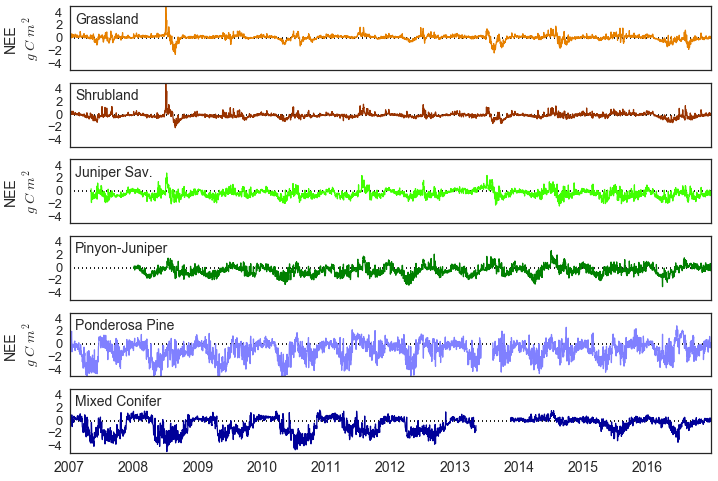

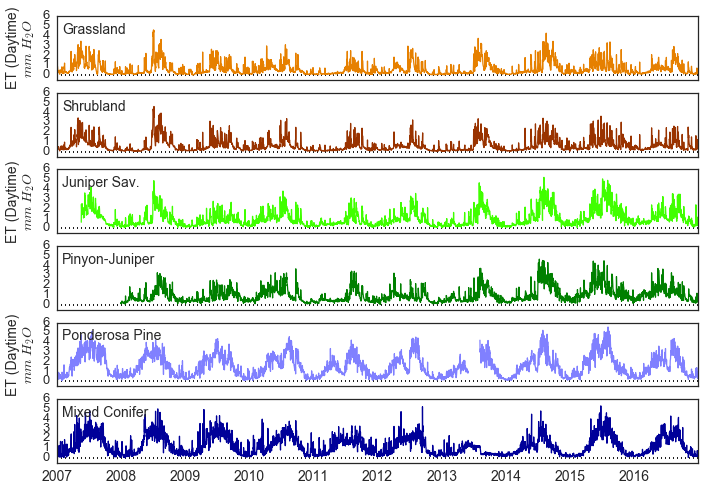

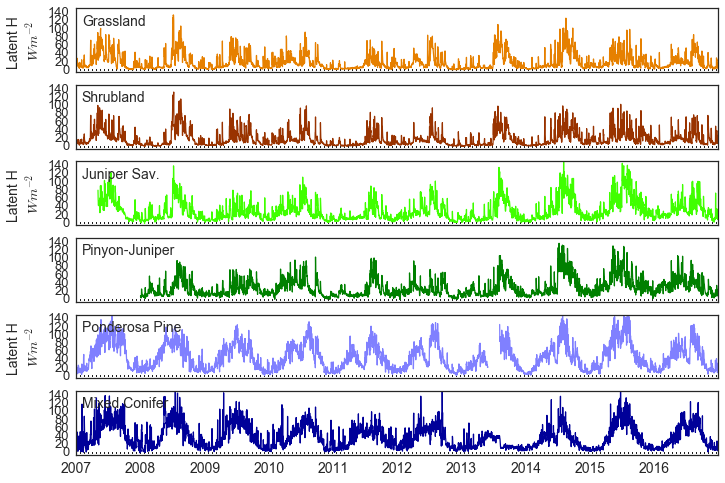

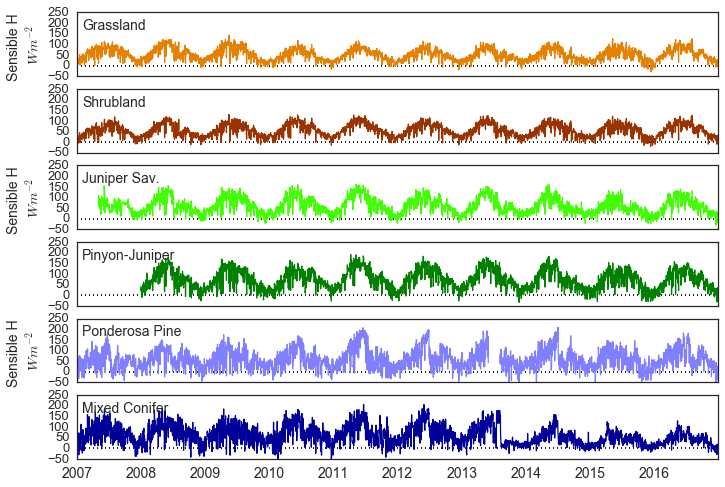

In [4]:
ylims = [ -5, 5 ]
fig1 = plt.figure(figsize=( 11.5, 8 ), dpi=150, facecolor='w', edgecolor='k')
ax = nmegplt.plot_tseries( d, 'FC_F_g_int', 2.4, fig1, 'NEE\n$g\ C\ m^2$', ylims=ylims)

ylims = [ -.5, 6 ]
fig2 = plt.figure(figsize=( 11.5, 8 ), dpi=150, facecolor='w', edgecolor='k')
ax = nmegplt.plot_tseries( d, 'ET_mm_dayint', 4.2, fig2, 'ET (Daytime)\n$mm\ H_2O$', ylims=ylims)

ylims = [ -5, 150 ]
fig3 = plt.figure(figsize=( 11.5, 8 ), dpi=150, facecolor='w', edgecolor='k')
ax = nmegplt.plot_tseries( d, 'LE_F_avg', 110, fig3, 'Latent H \n$Wm^{-2}$', ylims=ylims)

ylims = [ -50, 250 ]
fig4 = plt.figure(figsize=( 11.5, 8 ), dpi=150, facecolor='w', edgecolor='k')
ax = nmegplt.plot_tseries( d, 'H_F_avg', 170, fig4, 'Sensible H \n$Wm^{-2}$', ylims=ylims)

#plt.show()
fig1.savefig( fig_path + 'NMEG_daily_FC.svg')
fig1.savefig( fig_path + 'NMEG_daily_FC.png', dpi=200)

fig2.savefig( fig_path + 'NMEG_daily_ET.svg')
fig2.savefig( fig_path + 'NMEG_daily_ET.png', dpi=200)

## Plot partitioned C timeseries

* GPP is negative

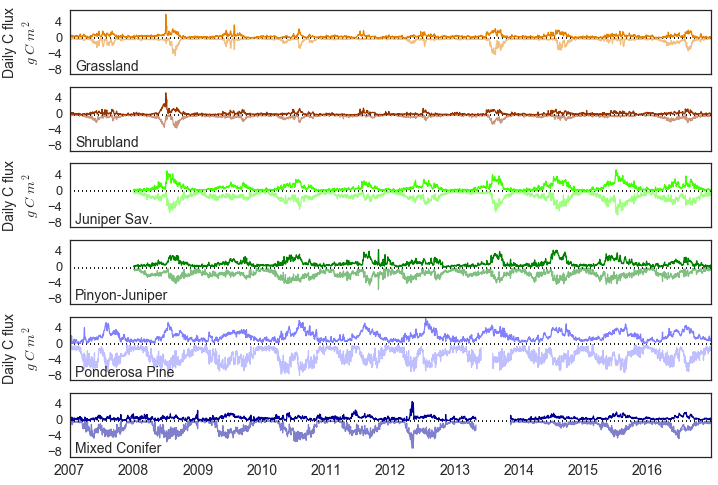

In [5]:
ylims = [ -9, 7 ]

fig5 = plt.figure(figsize=( 11.5, 8 ), dpi=150, facecolor='w', edgecolor='k')
ax = nmegplt.plot_tseries( d, ['RECO_g_int', 'GPP_g_int'], -8, fig5, 'Daily C flux\n$g\ C\ m^2$', ylims=ylims)
for j in range(0,6):
    ax[j].yaxis.set_ticks(np.arange(-8, 6, 4))

#plt.show()
fig5.savefig( fig_path + 'NMEG_daily_part.png', dpi=200)
fig5.savefig( fig_path + 'NMEG_daily_part.svg')


## Calculate multi-year statistics

Get multiyear descriptive stats (climatologies)

In [9]:
# Create dictionaries with modified climatology (see mod_clim)
# for each site
fc_clim = { s : tr.var_climatology( d[s].FC_F_g_int ) for s in sites}
gpp_clim = { s : tr.var_climatology( d[s].GPP_g_int ) for s in sites}
re_clim = { s :tr.var_climatology( d[s].RECO_g_int ) for s in sites}
le_clim = { s : tr.var_climatology( d[s].LE_F_avg ) for s in sites}
h_clim = { s : tr.var_climatology( d[s].H_F_avg ) for s in sites}
et_clim = { s : tr.var_climatology( d[s].ET_mm_24hint_0 ) for s in sites}
p_clim = { s : tr.var_climatology( d[s].P_F_sum ) for s in sites}

fc_clim['Seg'].columns

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', 'allyr_mean', 'allyr_stdev', 'allyr_stderr',
       'allyr_cv', 'allyr_cv2'],
      dtype='object')

### Set up plots

In [9]:
# Set x limits
xlims = [ dt.datetime( 2007, 1, 1 ), dt.datetime( 2016, 12, 31 )]

# Plot definition for one-site axis showing Multiyear mean + individual years in background
def plot_multiyr_lines( ax_in, clim, climcols, meancolor, 
                       syr=start, eyr=end, plterr=False,
                       indyrs=False, hilite=[None] ):
    if type(climcols) == type(str()):
        climcols = [climcols,]
        plterr = True
        meancolor = [meancolor,]
    else:
        meancolor = [meancolor,'red','gray']
            
    # If requested, plot individual years
    if indyrs: 
        for i in range( syr, eyr+1 ):
            # If requested, highlight a particular year in red
            if i in hilite:
                hicolour='Red'
            else:
                hicolour=[0.7, 0.7, 0.7]
            # Plot the individual year line (mean + anomaly)
            ax_in.plot(clim.index, clim[ str(i) ], 
                       color=hicolour, lw=0.5)
    #ls = ['-', '--', ':']
    for j, col in enumerate(climcols):
        if j > 0:
            ax_in.plot(clim.index, clim[col], color=meancolor[j], lw=0.5)
        else:
            ax_in.plot(clim.index, clim[col], color=meancolor[j])
        # Plot error of mean if requested
        if plterr:
            ax_in.plot(clim.index, clim[col] + clim.allyr_stderr, color=meancolor[j], alpha=.4)
            ax_in.plot(clim.index, clim[col] - clim.allyr_stderr, color=meancolor[j], alpha=.4)
    
# Plot definition for a 3 x 2 plot of multiyear mean fluxes
def plot_multiyr_mean_sites( clim_in, clim_cols, varname, texty, fighandle, ind_yrs=False,
                            xlims=[0,366], ylims=[-10,10], sitelist=sites,
                            sitenames=nmegplt.longnames, colors=nmegplt.palette, hilite_yr=None ):
    # If input is a list RE is pos, GPP is neg
    if type(clim_in) is list:
        clim = clim_in[0]
        clim2 = clim_in[1]
    else:
        clim = clim_in
    # Loop through sites/subplots
    ax = list();
    for i, site in enumerate(sitelist):
        ax.append(fighandle.add_subplot(len(sitelist)/3, 3, i+1))
        plt.plot( xlims, [0, 0], ':k')
        plot_multiyr_lines( ax[i], clim[site], clim_cols, colors[site], hilite=[hilite_yr], indyrs=ind_yrs )
        # If requested plot a series negative (usually GPP)
        if type(clim_in) is list:
            plot_multiyr_lines( ax[i], -clim2[site], clim_cols, colors[site], hilite=[hilite_yr], indyrs=ind_yrs )
        plt.ylim( ylims )
        plt.xlim( xlims )
        plt.text( 10, texty, sitenames[site], size=14  )
        plt.setp( ax[i].get_yticklabels(), fontsize=13)
        #ax[i].yaxis.set_ticks(np.arange(-8, 6, 4))
        if i < len(sitelist)-3:
            plt.setp( ax[i].get_xticklabels(), visible=False)
        else:
            plt.setp( ax[i].get_xticklabels(), fontsize=14)
            
    for i in range(0, len(sitelist)-1, 2):
        ax[i].set_ylabel('Mean ' + varname, fontsize=14)
        
    return ax

## Plot multiyear flux means

TypeError: object of type 'int' has no len()

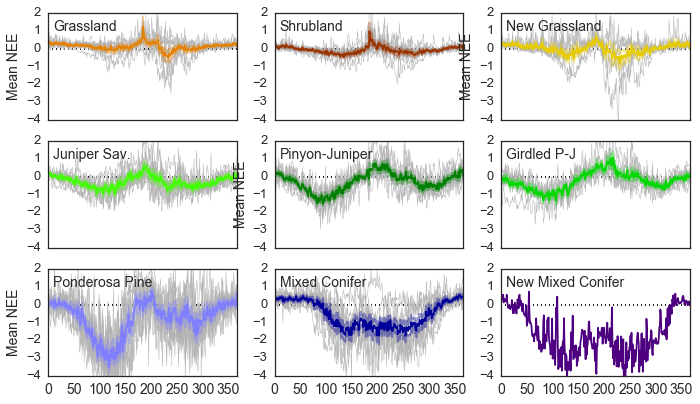

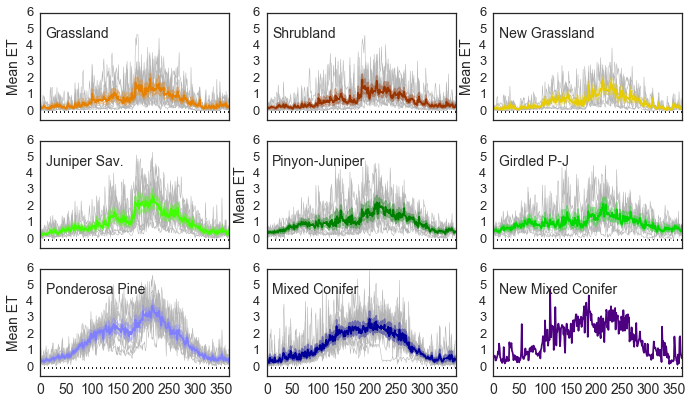

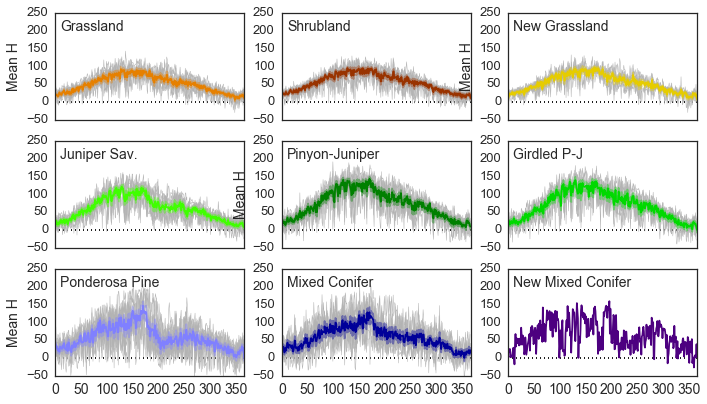

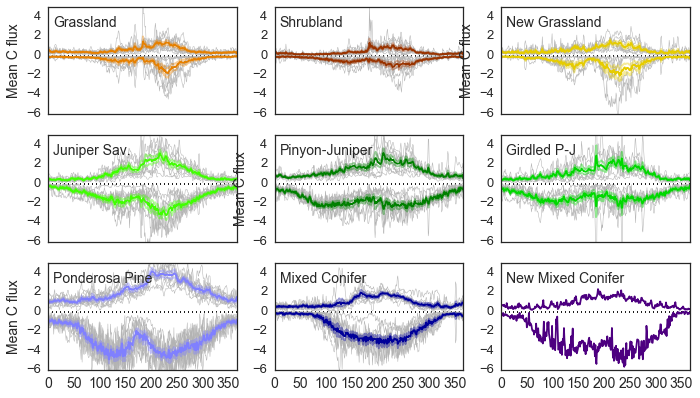

In [10]:
# Plot NEE
ylims = [ -4, 2 ]
xlims = [ 0, 366 ]
fig6 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_multiyr_mean_sites( fc_clim, 'allyr_mean', 'NEE', 1, fig6, ind_yrs=True,
                        ylims=ylims)     
fig6.savefig( fig_path + 'NMEG_mean_NEE.svg')
fig6.savefig( fig_path + 'NMEG_mean_NEE.png', dpi=200)

ylims = [ -.5, 6 ]
fig7 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_multiyr_mean_sites( et_clim, 'allyr_mean', 'ET', 4.5, fig7, ind_yrs=True,
                        ylims=ylims)     
# Commenting because it should look almost exacly the same shape as ET
#ylims = [ -5, 150 ]
#fig8 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
#plot_multiyr_mean_sites( le_clim, 'allyr_mean', 'LE', 100, fig8, ind_yrs=True,
#                        ylims=ylims)     

ylims = [ -50, 250 ]
fig9 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_multiyr_mean_sites( h_clim, 'allyr_mean', 'H', 200, fig9, ind_yrs=True,
                        ylims=ylims)     

# Plot RECO and GPP
ylims = [ -6, 5 ]
fig10 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_multiyr_mean_sites( [re_clim, gpp_clim], 'allyr_mean', 'C flux', 3, fig10,
                        ylims=ylims, ind_yrs=True)
fig10.savefig( fig_path + 'NMEG_mean_RECOGPP.svg')
fig10.savefig( fig_path + 'NMEG_mean_RECOGPP.png', dpi=600)
fig10.savefig( fig_path + 'NMEG_mean_RECOGPP.tiff', dpi=600)

TypeError: object of type 'int' has no len()

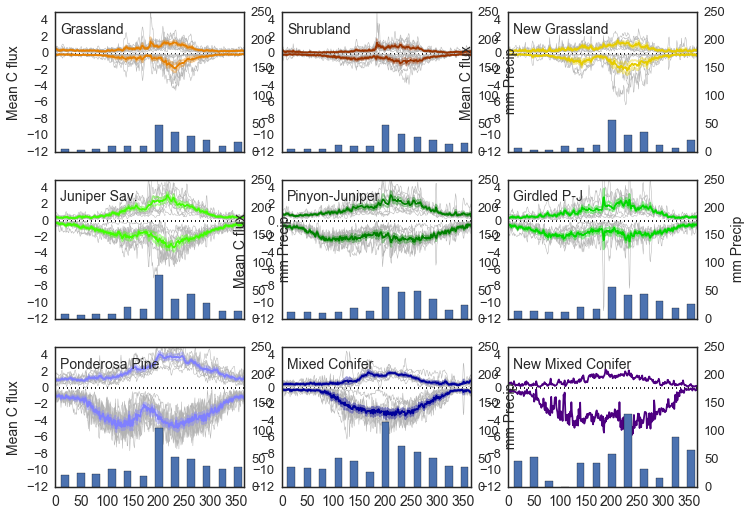

In [32]:
# Plot RECO and GPP
ylims = [ -12, 5 ]
fig11 = plt.figure(figsize=( 11.5, 8.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plot_multiyr_mean_sites( [re_clim, gpp_clim], 'allyr_mean', 'C flux', 2.5, fig11,
                        ylims=ylims, ind_yrs=True)

# Make keys for grouping and plotting
grpkey = pd.date_range( '2008-01-01', '2008-12-31', freq='1D')
plotkey = pd.date_range( '2008-01-1', periods=12, freq = '1MS')

for i, site in enumerate(sites):
    data = p_clim[site].allyr_mean.groupby(grpkey.month).sum()
    axnew = ax[i].twinx()
    axnew.set_xlim([0, 365])
    axnew.bar( plotkey.dayofyear + 10, data, 15 )
    axnew.set_ylim([0,250])
    plt.setp( axnew.get_yticklabels(), fontsize=13)
    if i % 2 != 0:
        axnew.set_ylabel(' mm Precip', fontsize=14)
fig11.savefig( fig_path + 'NMEG_mean_RECOGPP_P.svg')
fig11.savefig( fig_path + 'NMEG_mean_RECOGPP_P.png', dpi=300)
fig11.savefig( fig_path + 'NMEG_mean_RECOGPP_P.tiff', dpi=600)

In [ ]:
# Plot NEE
ylims = [ -7, 3 ]
xlims = [ 0, 366 ]
fig12 = plt.figure(figsize=( 11.5, 8.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plot_multiyr_mean_sites( fc_clim, 'allyr_mean', 'NEE', 1, fig12, ind_yrs=True,
                        ylims=ylims)     

# Make keys for grouping and plotting
grpkey = pd.date_range( '2008-01-01', '2008-12-31', freq='1D')
plotkey = pd.date_range( '2008-01-1', periods=12, freq = '1MS')

for i, site in enumerate(sites):
    data = p_clim[site].allyr_mean.groupby(grpkey.month).sum()
    axnew = ax[i].twinx()
    axnew.set_xlim([0, 365])
    axnew.bar( plotkey.dayofyear + 10, data, 15 )
    axnew.set_ylim([0,250])
    plt.setp( axnew.get_yticklabels(), fontsize=13)
    if i % 2 != 0:
        axnew.set_ylabel(' mm Precip', fontsize=14)
        
fig12.savefig( fig_path + 'NMEG_mean_NEE_P.svg')
fig12.savefig( fig_path + 'NMEG_mean_NEE_P.png', dpi=300)
fig12.savefig( fig_path + 'NMEG_mean_NEE_P.tiff', dpi=600)

## Cumulative sums by year

These show cumulative C flux (NEE or GPP) for each year measured.

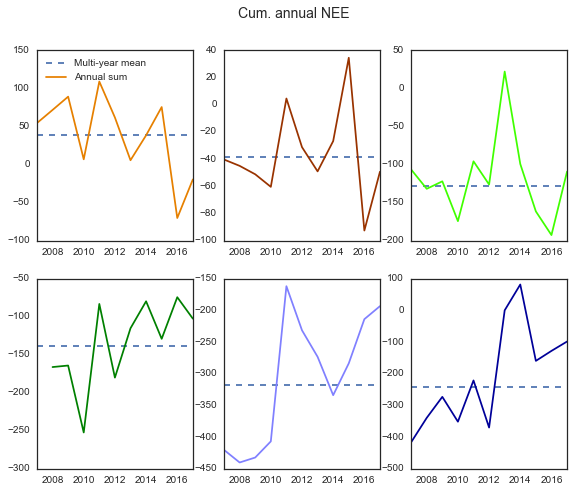

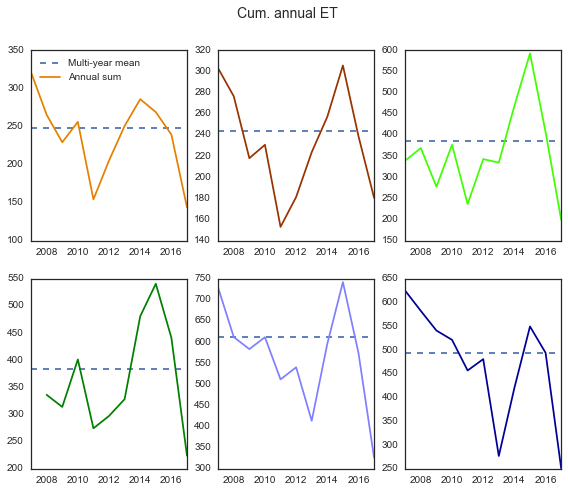

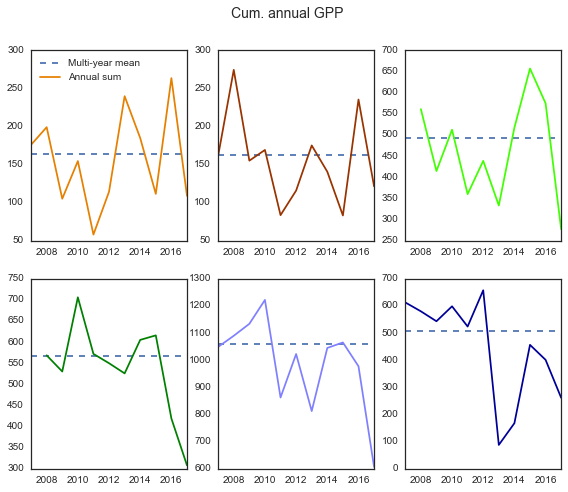

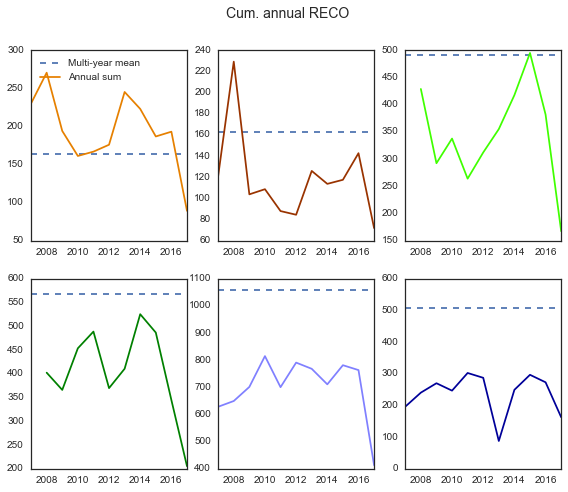

In [12]:
def plot_cumulative_annual( daily_var, clim, fig ):
    for i, site in enumerate(sites):
        ax = fig.add_subplot(len(sites)/3, 3, i+1)
        data = d[site][ daily_var ].groupby(d[site].index.year).sum()
        mean = clim[site].allyr_mean.sum()
        plt.plot([data.index[0], data.index[-1]], [mean, mean], ls='--')
        if site == 'Mpj':
            data = data[data.index > 2007]
        elif site == 'Vcs':
            data = data[data.index > 2015]
        else:
            data = data[data.index < end+1]
        plt.plot(data.index, data, color=nmegplt.palette[site])
        
        if i == 0:
            plt.legend(['Multi-year mean', 'Annual sum'], loc='upper left')
        plt.xlim([start, end])
        x_formatter = mpl.ticker.ScalarFormatter(useOffset=False)
        ax.xaxis.set_major_formatter(x_formatter)
        #print(data.GPP_g_int.sum())

figX = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_annual( 'FC_F_g_int', fc_clim, figX )
plt.suptitle('Cum. annual NEE', size=14)

figZZ = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_annual( 'ET_mm_24hint_0', et_clim, figZZ )
plt.suptitle('Cum. annual ET', size=14)

figY = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_annual( 'GPP_g_int', gpp_clim, figY )
plt.suptitle('Cum. annual GPP', size=14)

figYY = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_annual( 'RECO_g_int', gpp_clim, figYY )
plt.suptitle('Cum. annual RECO', size=14)

## Table of cumulative values

In [12]:
def climtable(clim, sitelist):
    # Make a table
    indices = ['2007', '2008', '2009', '2010', '2011', '2012', '2013',
               '2014', '2015', '2016', 'allyr_mean', 'allyr_stdev']
    tbl = pd.DataFrame(columns=sitelist, index = indices)
    # Sum up the climatology columns for the site
    for site in sitelist:
        sums = clim[site].sum()
        # Add each sum to correct site column
        for j in indices:
            tbl.loc[j, site] = sums[j]
    
    return tbl

nee_t = climtable(fc_clim, sites)
nee_t

,Seg,Ses,Sen,Wjs,Mpj,Mpg,Vcp,Vcm,Vcs
2007,51.477,-29.7178,NaN,-96.535,NaN,NaN,-394.011,-377.884,NaN
2008,69.7949,-36.642,NaN,-74.8294,-135.501,NaN,-420.607,-315.243,NaN
2009,89.0654,-38.0213,NaN,-121.683,-132.852,-202.574,-381.114,-246.662,NaN
2010,9.55477,-50.2576,-49.6339,-147.226,-212.281,-130.655,-365.34,-320.385,NaN
2011,108.975,10.2559,139.227,-58.8542,-83.3333,-57.1688,-141.022,-203.548,NaN
2012,63.9761,-23.4102,25.2058,-97.2186,-142.893,-95.8662,-172.262,-338.56,NaN
2013,4.97413,-40.6532,-78.5138,45.4394,-72.4374,36.1588,-305.808,-114.668,NaN
2014,41.401,-12.4444,-48.2738,-80.7074,-27.1549,-47.6729,-266.214,115.586,NaN
2015,80.3642,46.081,46.031,-161.287,-82.2136,-90.7539,-177.142,-109.116,NaN
2016,-70.138,-99.629,-73.7553,-192.433,-74.2469,-139.017,-211.622,-135.076,-597.866


In [13]:
gpp_t = climtable(gpp_clim, sites)
gpp_t

,Seg,Ses,Sen,Wjs,Mpj,Mpg,Vcp,Vcm,Vcs
2007,165.219,173.311,NaN,517.451,NaN,NaN,1046.89,713.343,NaN
2008,195.793,226.321,NaN,585.656,619.592,NaN,1083.87,639.833,NaN
2009,104.922,157.437,NaN,421.924,578.354,524.606,1159.04,568.729,NaN
2010,148.413,165.824,240.975,521.09,782.025,628.105,1184.36,659.249,NaN
2011,57.8335,83.5615,79.4953,337.011,571.843,353.136,873.521,571.303,NaN
2012,131.041,122.105,174.413,438.677,564.513,381.859,1024.1,672.273,NaN
2013,248.717,190.654,358.52,348.558,535.303,315.924,940.913,529.747,NaN
2014,185.184,132.979,264.236,522.668,665.146,453.535,1093.34,215.96,NaN
2015,116.369,104.002,151.859,733.912,686.21,599.625,1111.03,512.969,NaN
2016,262.268,251.067,291.716,576.906,463.755,565.267,973.447,406.029,921.345


In [14]:
reco_t = climtable(re_clim, sites)
reco_t

,Seg,Ses,Sen,Wjs,Mpj,Mpg,Vcp,Vcm,Vcs
2007,216.695,143.593,NaN,420.916,NaN,NaN,652.875,335.46,NaN
2008,265.588,189.68,NaN,510.827,484.092,NaN,663.26,324.59,NaN
2009,193.987,119.415,NaN,303.088,445.502,322.031,777.924,322.067,NaN
2010,157.968,115.566,191.342,373.864,569.743,497.45,819.016,338.864,NaN
2011,166.809,93.8174,218.722,278.156,488.509,295.968,732.499,367.755,NaN
2012,195.017,98.6945,199.619,341.458,421.62,285.992,851.835,333.713,NaN
2013,253.691,150.001,280.007,393.998,462.866,352.082,635.105,415.079,NaN
2014,226.585,120.534,215.962,441.961,637.991,405.862,827.126,331.547,NaN
2015,196.733,150.083,197.89,572.625,603.997,508.871,933.884,403.852,NaN
2016,192.13,151.438,217.96,400.583,389.509,426.25,761.825,270.953,323.48


## Cumulative NEE

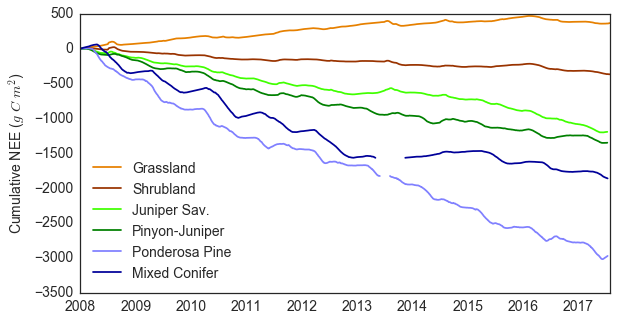

In [14]:
fig4 = plt.figure( figsize=( 9.5, 5 ), dpi=150, facecolor='w', edgecolor='k' )
var = 'FC_F_g_int'
ax = fig4.add_subplot(111)
idx = d.Seg.index.year > 2007
plt.plot( d.Seg[idx].index, d.Seg.loc[ idx, var ].cumsum(), color=nmegplt.palette['Seg'] )
idx = d.Ses.index.year > 2007
plt.plot( d.Ses[idx].index, d.Ses.loc[ idx, var ].cumsum(), color=nmegplt.palette['Ses'] )
idx = d.Wjs.index.year > 2007
plt.plot( d.Wjs[idx].index, d.Wjs.loc[ idx, var ].cumsum(), color=nmegplt.palette['Wjs'] )
idx = d.Mpj.index.year > 2007
plt.plot( d.Mpj[idx].index, d.Mpj.loc[ idx, var ].cumsum(), color=nmegplt.palette['Mpj'] )
idx = d.Vcp.index.year > 2007
plt.plot( d.Vcp[idx].index, d.Vcp.loc[ idx, var ].cumsum(),color=nmegplt.palette['Vcp'] )
#idx = np.logical_and( d.Vcm.index.year > 2007, d.Vcm.index.year < 2015 )
idx = d.Vcm.index.year > 2007
plt.plot( d.Vcm[idx].index, d.Vcm.loc[ idx, var ].cumsum(), color=nmegplt.palette['Vcm'] )
#idx = d.Vcs.index.year > 2007
#plt.plot( d.Vcs[idx].index, d.Vcs.loc[ idx, var ].cumsum(), color=nmegplt.palette['Vcs'] )
plt.ylabel(r'Cumulative NEE ($g\ C\ m^2$)', fontsize=14)
plt.setp( ax.get_yticklabels(), fontsize=14)
plt.setp( ax.get_xticklabels(), fontsize=14)
names = [nmegplt.longnames[x] for x in ['Seg','Ses','Wjs','Mpj','Vcp','Vcm','Vcs']]
plt.legend( names, loc='lower left',
           fontsize=14)
plt.show()

fig4.savefig( fig_path + 'NMEG_allyr_cum_cflux.svg')
fig4.savefig( fig_path + 'NMEG_allyr_cum_cflux.png', dpi=200)

## Cumulative flux variability

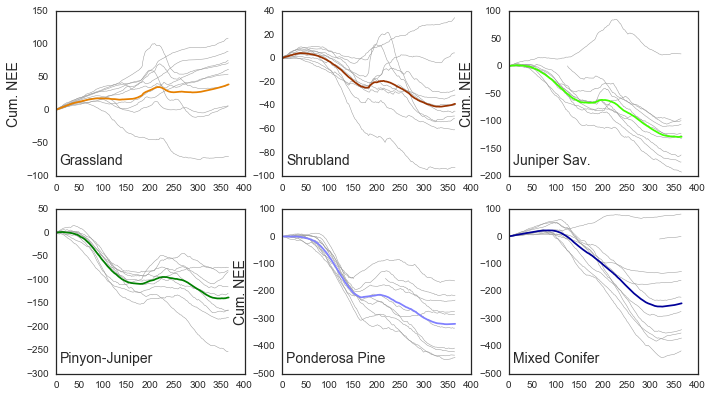

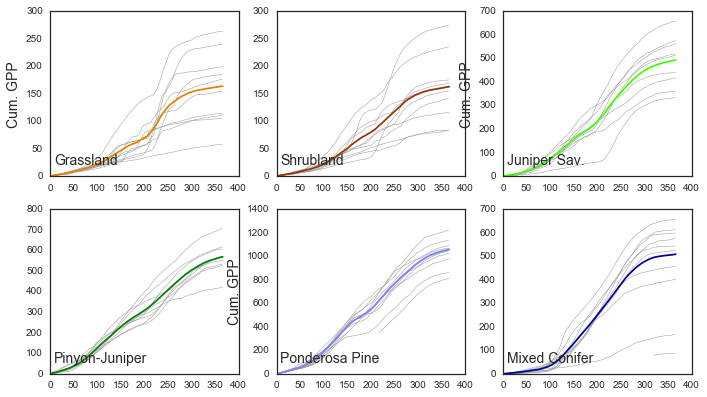

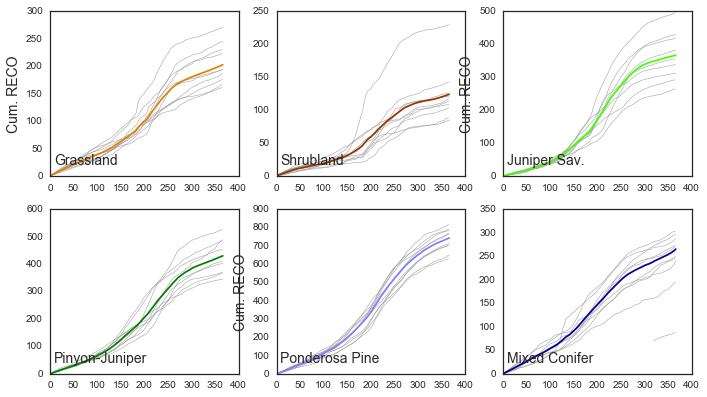

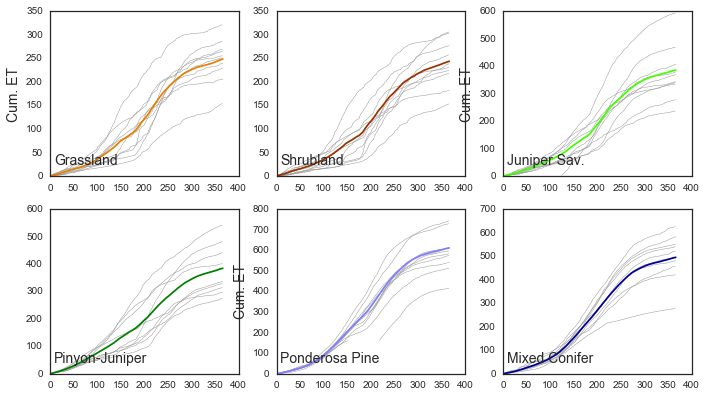

In [13]:
def plot_cumulative_flux( clim, fig, label ):
    ax = list();
    for i, site in enumerate(sites):
        ax.append(fig.add_subplot(len(sites)/3, 3, i+1))
        for j in range(start, end):
            sitedat = clim[site]
            plt.plot( sitedat.index,  np.cumsum(sitedat[str(j)]), color='0.6', lw=0.5)
        plt.plot( clim[site].index,  np.cumsum(clim[site].allyr_mean), color=nmegplt.palette[site])
            
        #plt.xlim( xlims )
        plt.text( .02, .07, nmegplt.longnames[site], size=14, transform=ax[i].transAxes )
        
    for i in (0, 2, 4):
            ax[i].set_ylabel('Cum. {0}'.format(label), fontsize=14)
            
figX = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_flux( fc_clim, figX, 'NEE' )

figY = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_flux( gpp_clim, figY, 'GPP' )

figZ = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_flux( re_clim, figZ, 'RECO' )

figZZ = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_flux( et_clim, figZZ, 'ET' )

## Opposing flux cumulative plots

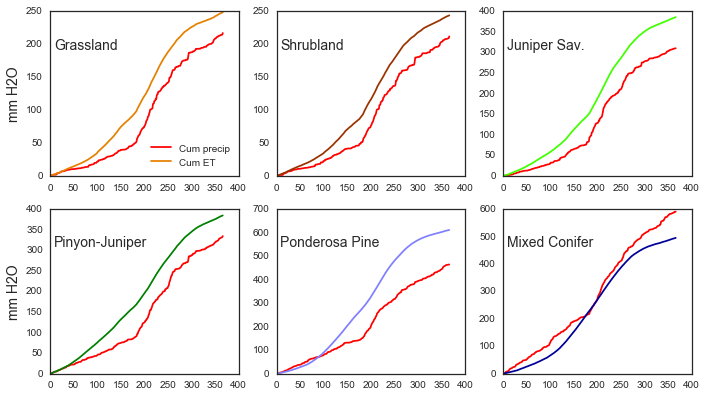

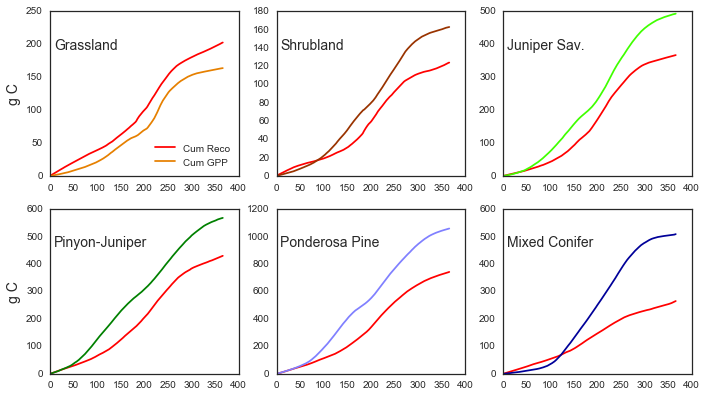

In [16]:
def plot_cumulative_flux( clim1, clim2, fig, label, legtxt ):
    ax = list();
    for i, site in enumerate(sites):
        ax.append(fig.add_subplot(len(sites)/3, 3, i+1))
        plt.plot( clim2[site].index,  np.cumsum(clim2[site].allyr_mean), color='red')
        plt.plot( clim1[site].index,  np.cumsum(clim1[site].allyr_mean), color=nmegplt.palette[site])
            
        #plt.xlim( xlims )
        plt.text( .02, .77, nmegplt.longnames[site], size=14, transform=ax[i].transAxes )
        if i==0:
            plt.legend(legtxt, loc='lower right')
    for i in range(0, len(sites), 3):
            ax[i].set_ylabel(label, fontsize=14)
            
figX = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_flux( et_clim, p_clim, figX, 'mm H2O', ['Cum precip', 'Cum ET'])

figX.savefig( fig_path + 'opposing_flux_cumulative.svg')
figX.savefig( fig_path + 'opposing_flux_cumulative.png', dpi=200)

figY = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_flux( gpp_clim, re_clim, figY, 'g C', ['Cum Reco', 'Cum GPP'] )